# Customer Churn Prediction for FitLife Gym

## CRISP-DM

The **Cross-Industry Standard Process for Data Mining** (CRISP-DM) is a widely-adopted framework that provides a systematic approach to developing data mining and machine learning projects. It divides the workflow into six iterative phases:

1. **Business Understanding**: Define the project goals and understand the business context to align the analysis with stakeholder needs.
2. **Data Understanding**: Explore and analyze the dataset to identify key features, relationships, and potential challenges such as missing values or data imbalances.
3. **Data Preparation**: Clean, transform, and preprocess the data to ensure it is ready for modeling, addressing issues like missing values, encoding, scaling, and data splits.
4. **Modeling**: Select and train appropriate algorithms to develop predictive models, optimizing performance through hyperparameter tuning and cross-validation.
5. **Evaluation**: Assess the model’s effectiveness using relevant metrics and ensure it meets the business objectives.
6. **Deployment**: Integrate the final model into production, enabling practical applications and ensuring continuous performance monitoring.

**CRISP-DM** is iterative, emphasizing refinement and adaptability, making it an effective framework for applying artificial intelligence/ machine learning techniques.


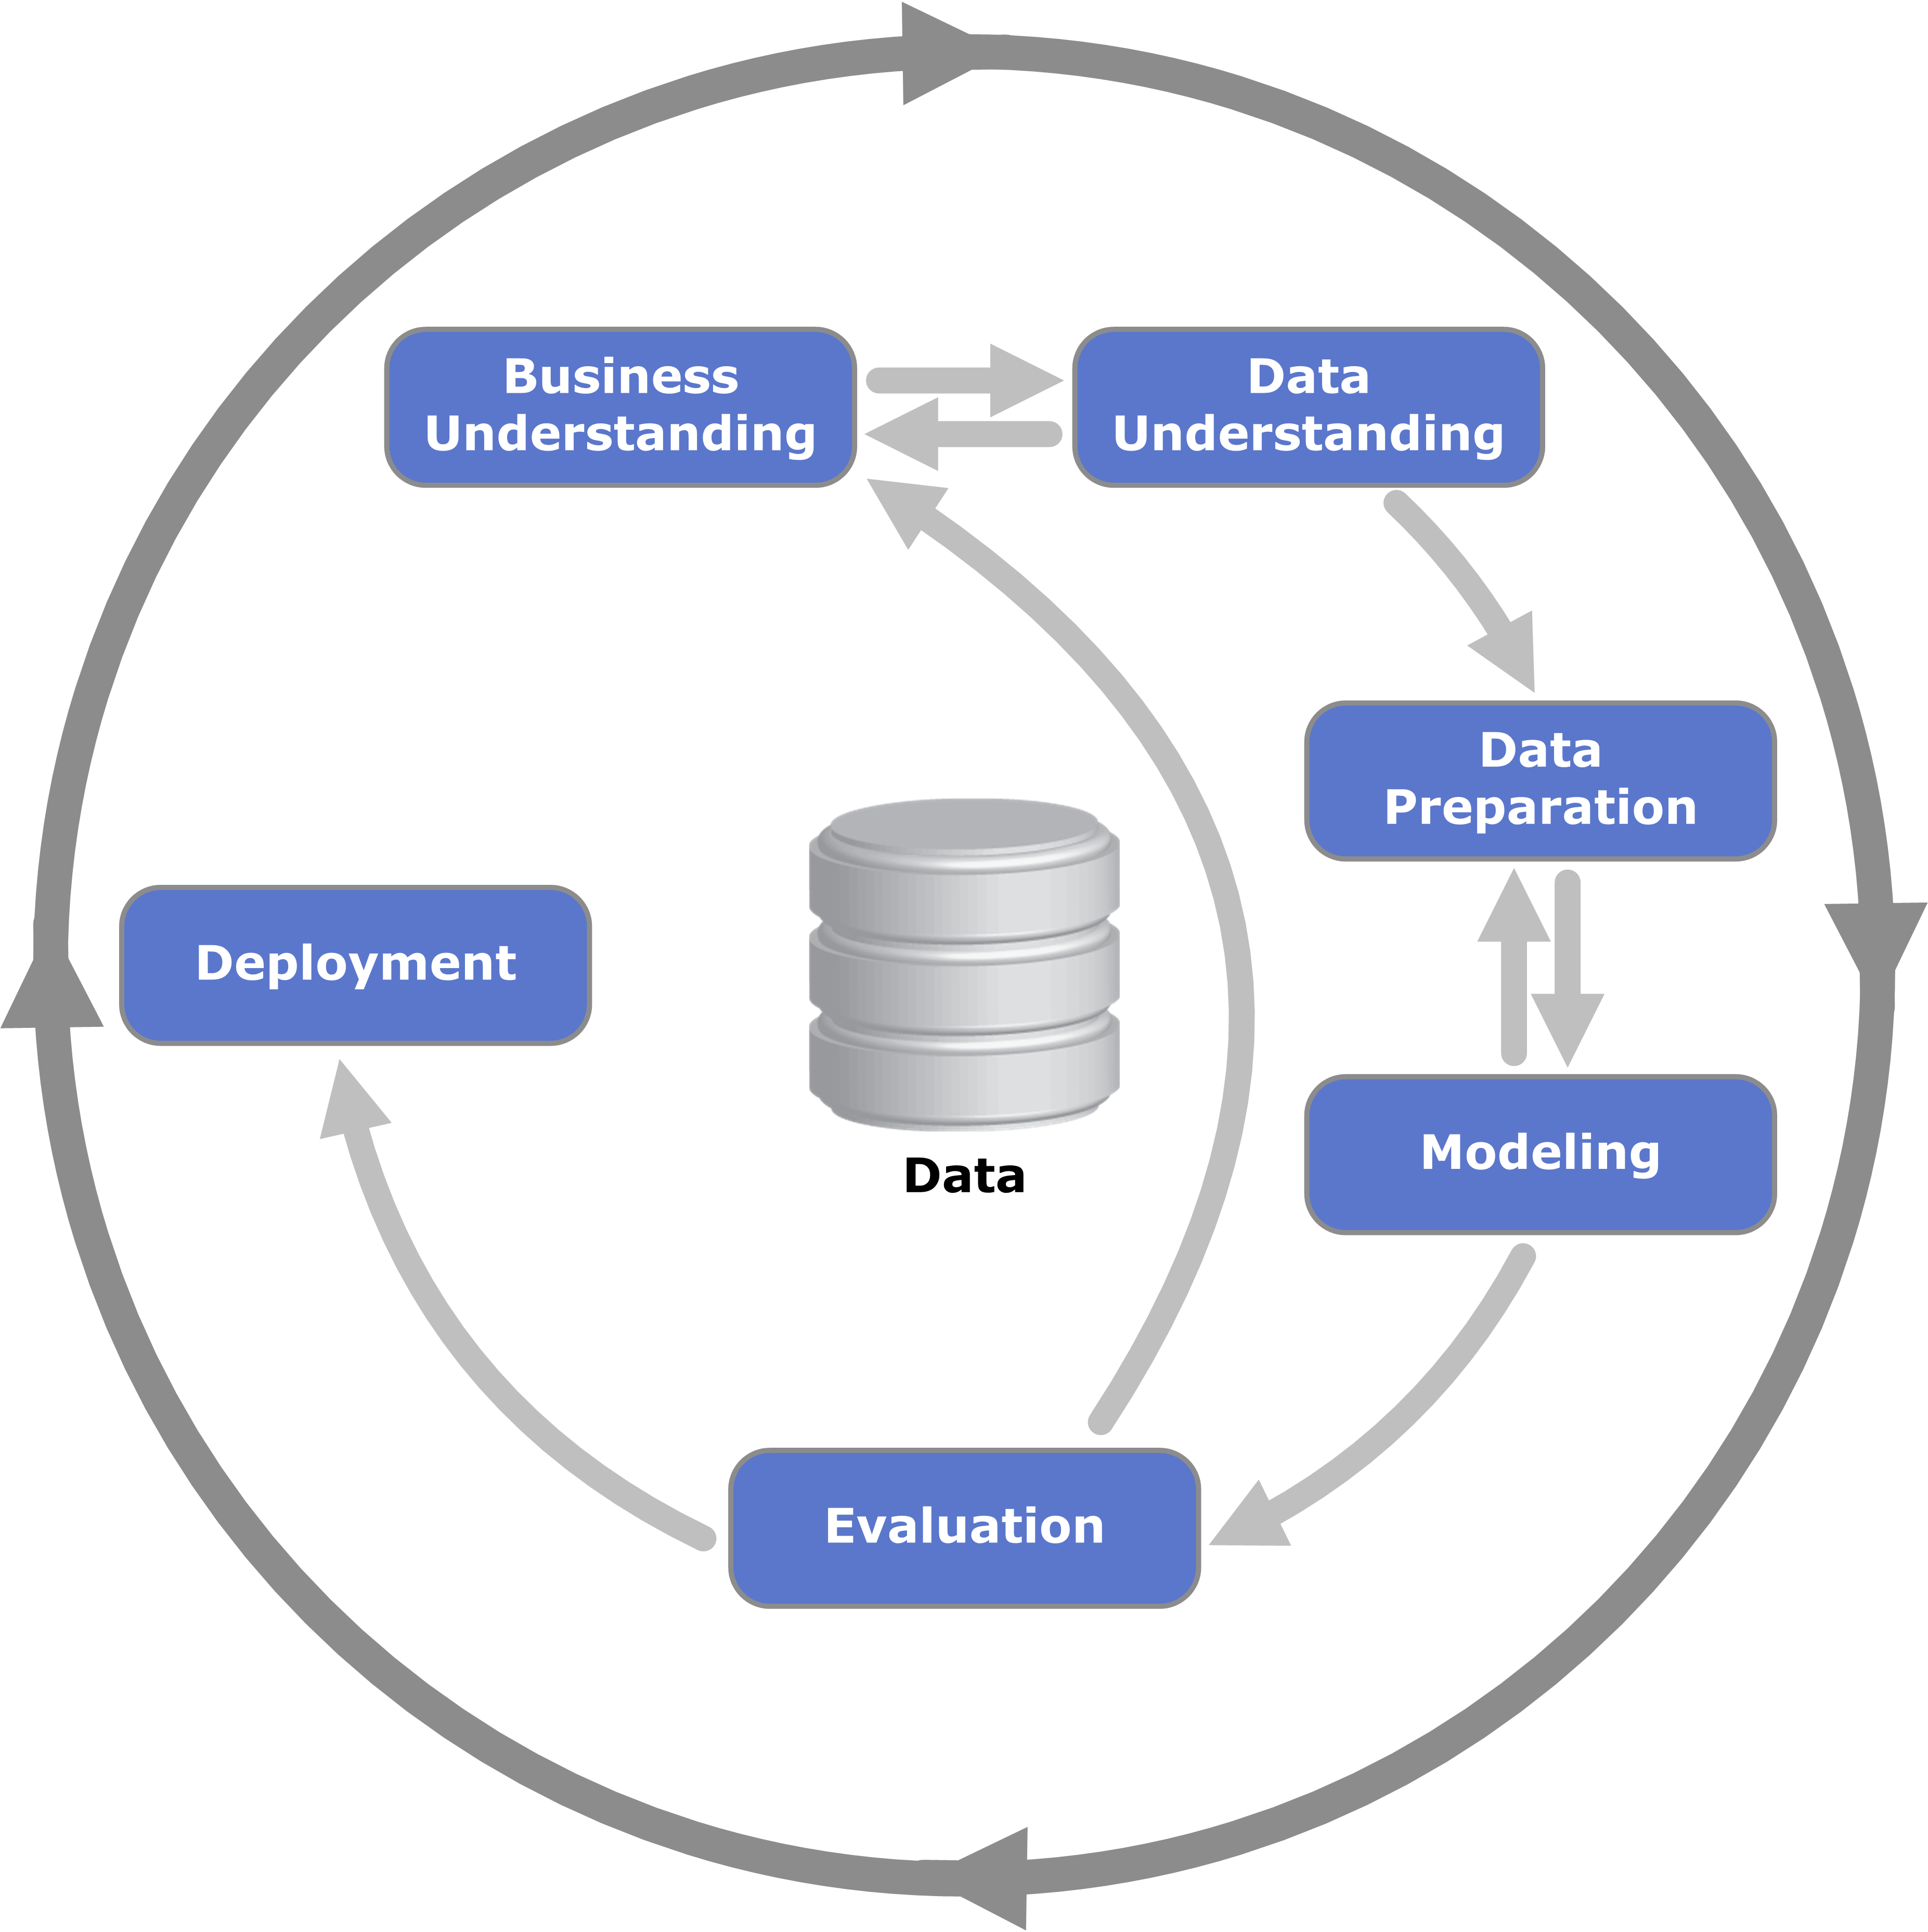

In [1]:
from IPython import display
display.Image('https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png', width=500)

## 1. Business Understanding

### 1.1 Business Context

**FitLife Gym** is a growing chain of fitness centers that prides itself on offering personalized fitness experiences to its members. The gym operates across multiple urban and suburban locations. It caters to a diverse customer base, including working professionals, students, and fitness enthusiasts. **FitLife Gym** provides a variety of services, including group classes, personal training sessions, wellness programs, and premium facilities such as saunas and swimming pools. Membership options are flexible, allowing customers to choose between monthly, quarterly, and annual contracts.


**Stakeholders**:
- **Marketing Team**: Needs to identify high-risk customers for personalized retention campaigns.
- **Senior Management**: Interested in improving profitability and customer satisfaction.


### 1.2 Problem Statement

With the rise of competition from boutique fitness studios and online workout platforms, FitLife Gym is under pressure to maintain its customer base and deliver a personalized experience. The gym’s management has recently noticed an alarming trend: a significant number of members are canceling their memberships within the first year. This phenomenon, known as customer churn, poses a serious threat to the gym’s profitability. Retaining customers is not only more cost-effective than acquiring new ones but also contributes substantially to long-term revenue growth. Research shows that **acquiring a new customer is significantly more expensive** than retaining an existing one—between **five to 25 times more costly**. On the other hand, research also highlights that increasing customer retention rates by just 5% can boost profits by 25% to 95%. This underscores the importance of keeping existing members engaged and satisfied.

Source: https://hbr.org/2014/10/the-value-of-keeping-the-right-customers

However, the business lacks a systematic approach to identifying customers who are at risk of leaving. Currently, they rely on reactive measures, addressing churn only after customers have already decided to cancel their policies. This reactive approach is inefficient and fails to prevent revenue loss.

To address this challenge, the management team has decided to leverage data-driven strategies. By analyzing historical membership data, they aim to identify patterns and predict which members are at risk of churning. This predictive capability will enable the team to design targeted interventions, such as personalized offers, loyalty rewards, or enhanced engagement programs, to retain at-risk members.




### 1.3 Research Question

**Primary Research Question**:

Understanding why members leave and predicting churn early can help **FitLife Gym** proactively address member concerns. For example:

	•	Members with low gym attendance may need motivation through personalized fitness plans.
	•	Those nearing the end of their contracts could be offered renewal discounts or incentives.
	•	Members with high additional charges might benefit from transparent communication about pricing.

The goal of this project is to answer the following question:

**Can we predict whether a gym member will churn based on their demographic details, membership type, usage patterns, and engagement metrics?**

    
The purpose of these predictions is to help **FitLife Gym**:

1. *Reduce the churn rate by identifying at-risk members early.*
2. *Increase customer lifetime value by improving retention strategies.*
3. *Enhance member satisfaction through personalized engagement.*

## 2. Data Understanding

### 2.1 Library import

In [127]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') # Removes warnings

### 2.2 Read Data

In [3]:
# Let's begin by loading the dataset to understand its structure, including column names, data types, and summary statistics.

In [4]:
# Local: Load the dataset
df = pd.read_csv('../gym_churn_us.csv')

# Or directly from Kaggle:
# df = pd.read_csv('/kaggle/input/gym-customers-features-and-churn/gym_churn_us.csv')

### 2.3 Exploratory Data Analysis

#### Dataset Column Descriptions

The dataset `gym_churn_us.csv` contains information about gym members, their demographics, membership details, and gym usage patterns. The target variable is `Churn`, which indicates whether a member has canceled their membership (1) or remains active (0). Below is a description of each column in the dataset:

| **Column Name**                     | **Description**                                                                                       | **Data Type** |
|-------------------------------------|-------------------------------------------------------------------------------------------------------|---------------|
| `gender`                            | Gender of the member (1 = Male, 0 = Female).                                                          | Categorical   |
| `Near_Location`                     | Whether the member lives near the gym (1 = Yes, 0 = No).                                              | Categorical   |
| `Partner`                           | Whether the member is an employee of a partner company (1 = Yes, 0 = No).                             | Categorical   |
| `Promo_friends`                     | Whether the member joined through a promotion with friends (1 = Yes, 0 = No).                         | Categorical   |
| `Phone`                             | Whether the member provided their phone number (1 = Yes, 0 = No).                                     | Categorical   |
| `Contract_period`                   | Length of the membership contract in months (e.g., 1, 6, or 12 months).                               | Numerical     |
| `Group_visits`                      | Whether the member attended group classes (1 = Yes, 0 = No).                                          | Categorical   |
| `Age`                               | Age of the member in years.                                                                           | Numerical     |
| `Avg_additional_charges_total`      | Average total additional charges incurred by the member (e.g., for personal training or merchandise). | Numerical     |
| `Month_to_end_contract`             | Number of months remaining until the membership contract ends.                                        | Numerical     |
| `Lifetime`                          | Total number of months the member has been with the gym.                                              | Numerical     |
| `Avg_class_frequency_total`         | Member's average frequency of attending gym classes per week over their lifetime.                     | Numerical     |
| `Avg_class_frequency_current_month` | Member's average frequency of attending gym classes per week in the current month.                    | Numerical     |
| `Churn`                             | Target variable indicating whether the member has churned (1 = Yes, 0 = No).                          | Categorical   |


#### Load and Inspect the Dataset

In [7]:
#Check the number of rows and columns
df.shape

(4000, 14)

In [8]:
# List index
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [9]:
#Display first few rows for inspection
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [11]:
# Display basic information about the dataset (structure, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            200000 non-null  int64  
 1   Customer Name         200000 non-null  object 
 2   Customer_Address      200000 non-null  object 
 3   Company Name          200000 non-null  object 
 4   Claim Reason          200000 non-null  object 
 5   Data confidentiality  200000 non-null  object 
 6   Claim Amount          200000 non-null  int64  
 7   Category Premium      200000 non-null  int64  
 8   Premium/Amount Ratio  200000 non-null  float64
 9   Claim Request output  200000 non-null  object 
 10  BMI                   200000 non-null  int64  
 11  Churn                 200000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 18.3+ MB


#### Summarize Statistical Properties

In [10]:
# Display summary statistics about the dataset
df.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Explore the Target Variable

In [11]:
# Count values for dependent variable y (Churn)
df['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

#### Check for Missing Values

In [12]:
# Check missing data
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### Check for Duplicates

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Check outliers

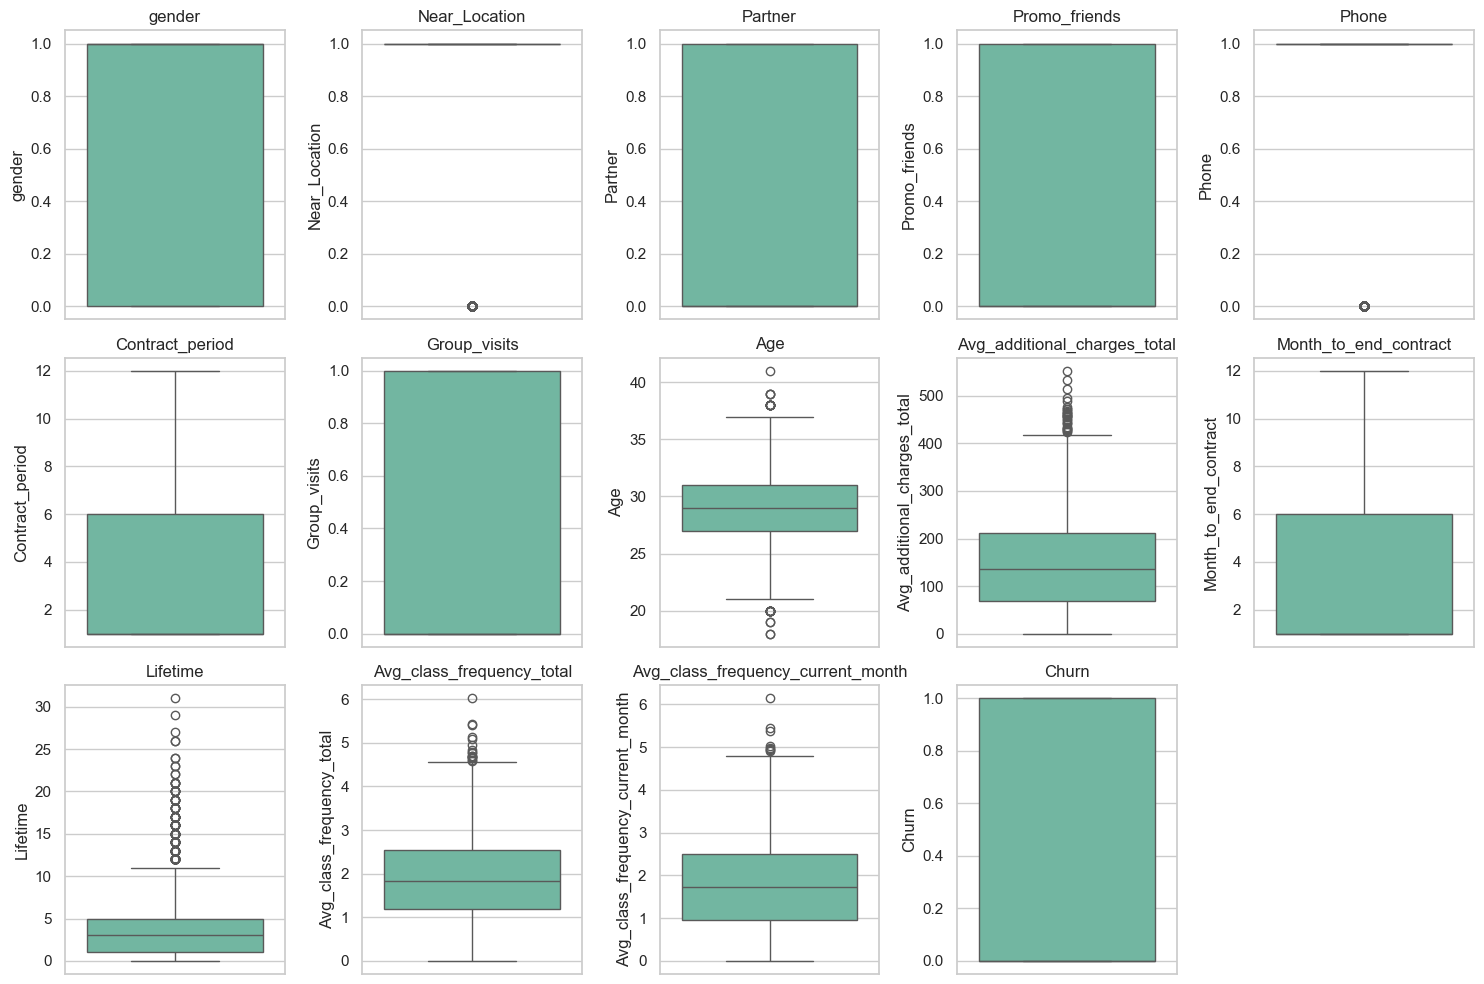

In [128]:
# Detecting outliers using boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column], palette="Set2")
    plt.title(column)
plt.tight_layout()
plt.show()

#### Data visualization

In [31]:
# Set up the plotting style
sns.set(style="whitegrid")

#### Identify Data Imbalance

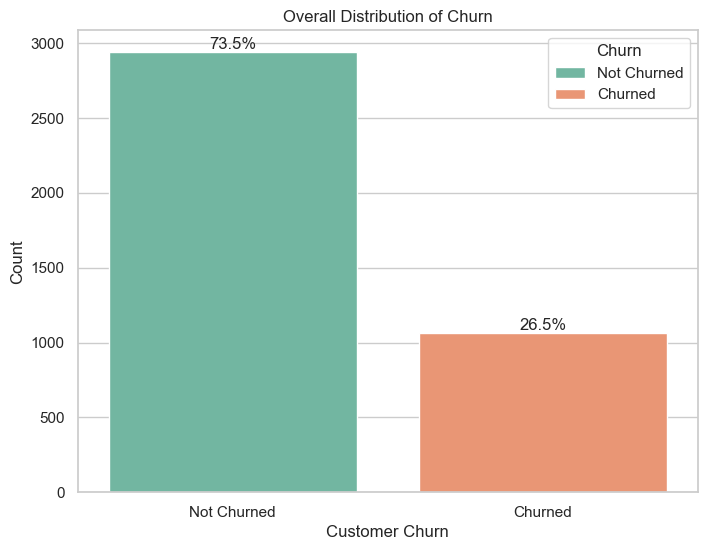

In [141]:
# Plot distribution of Churn with percentages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Churn", palette="Set2")

# Calculate the percentage of churned and not churned customers
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Adding percentage annotations above the bars
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    plt.text(x=i,  # Position on the x-axis
             y=count + 5,  # Position slightly above the bar
             s=f'{percentage:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)

# Set labels and title
plt.title("Overall Distribution of Churn")
plt.xlabel("Customer Churn")
plt.ylabel("Count")

# Adding legend
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.show()


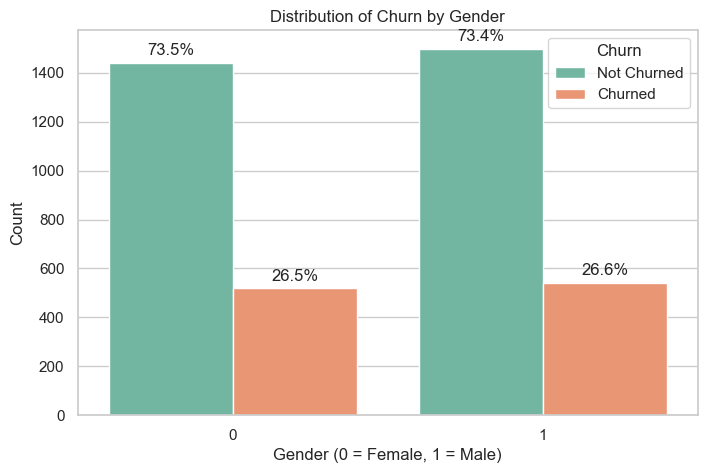

In [78]:
# Distribution of Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn by Gender')
plt.ylabel('Count')
plt.xlabel('Gender (0 = Female, 1 = Male)')

# Calculate percentage distribution
gender_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
gender_counts_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations
for i in range(len(gender_counts.index)):
    total = gender_counts.values[i].sum()
    for j in range(len(gender_counts.columns)):
        percentage = gender_counts_percentage.values[i, j]
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position for each bar
                 y=gender_counts.values[i, j] + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)


plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


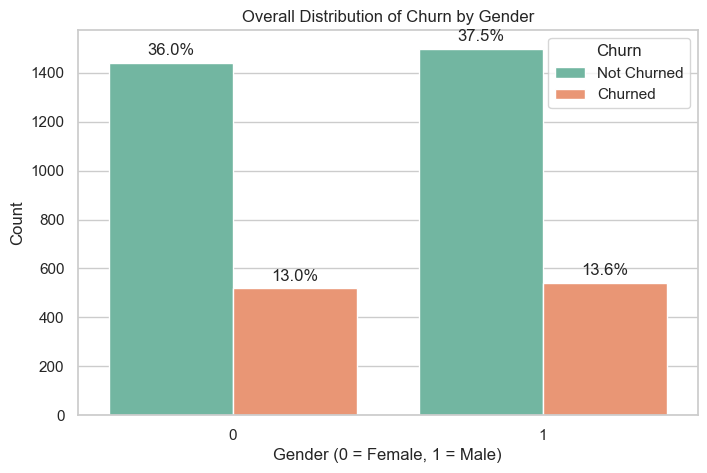

In [140]:
# Distribution of Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title('Overall Distribution of Churn by Gender')
plt.ylabel('Count')
plt.xlabel('Gender (0 = Female, 1 = Male)')

# Calculate percentage distribution based on the overall count
gender_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
gender_counts_percentage = gender_counts.div(gender_counts.sum().sum(), axis=0) * 100  # Using total count for overall percentage

# Adding percentage annotations
for i in range(len(gender_counts.index)):
    total = gender_counts.values[i].sum()
    for j in range(len(gender_counts.columns)):
        percentage = gender_counts_percentage.values[i, j]
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position for each bar
                 y=gender_counts.values[i, j] + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


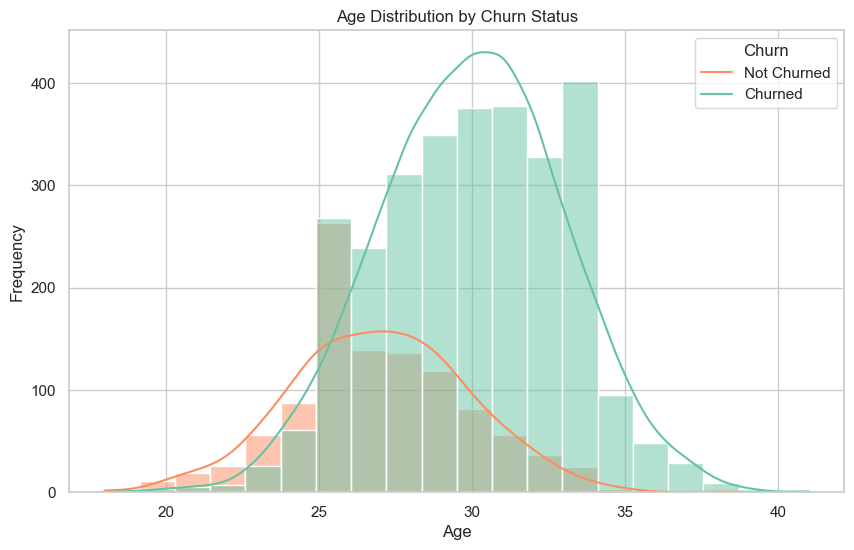

In [77]:
# Plot distribution of Age with respect to Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Churn", kde=True, bins=20, palette="Set2")
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Churn", labels=['Not Churned', 'Churned'])
plt.show()

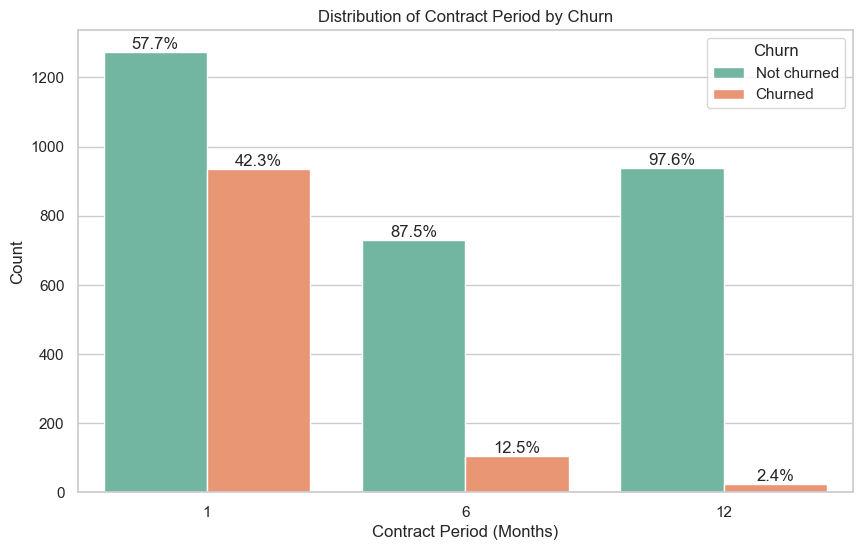

In [96]:
# Plot distribution of Contract Period by Churn with percentages above the bars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract_period", hue="Churn", palette="Set2")
plt.title("Distribution of Contract Period by Churn")
plt.xlabel("Contract Period (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not churned", "Churned"])

# Calculate percentage distribution
contract_period_counts = df.groupby(['Contract_period', 'Churn']).size().unstack(fill_value=0)
contract_period_counts_percentage = contract_period_counts.div(contract_period_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_period_counts.index)):
    for j in range(len(contract_period_counts.columns)):
        count_value = contract_period_counts.values[i, j]
        percentage = contract_period_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()

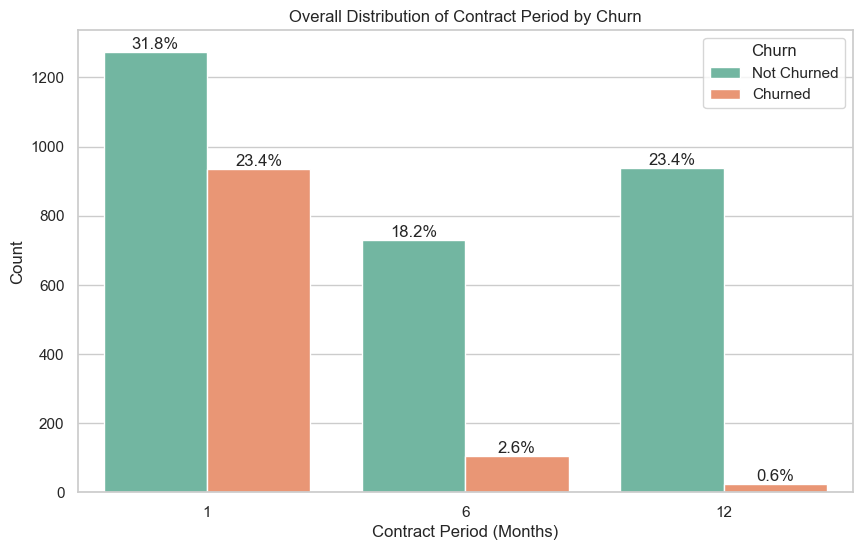

In [142]:
# Plot distribution of Contract Period by Churn with percentages above the bars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract_period", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Contract Period by Churn")
plt.xlabel("Contract Period (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate the overall distribution of counts (for percentages relative to the entire dataset)
contract_period_counts = df.groupby(['Contract_period', 'Churn']).size().unstack(fill_value=0)
contract_period_counts_total = contract_period_counts.sum().sum()  # Total number of entries

# Calculate percentage distribution relative to the overall count
contract_period_counts_percentage = contract_period_counts.div(contract_period_counts_total, axis=None) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_period_counts.index)):
    for j in range(len(contract_period_counts.columns)):
        count_value = contract_period_counts.values[i, j]
        percentage = contract_period_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


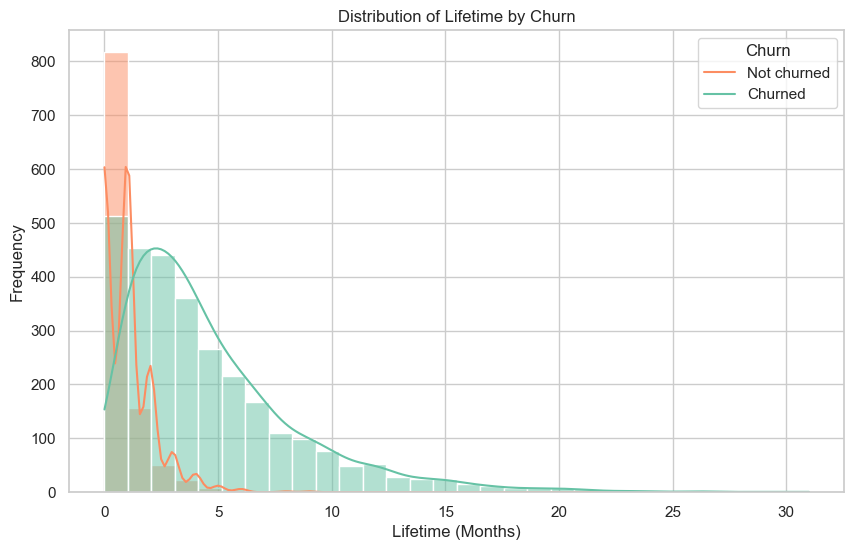

In [73]:
# Plot distribution of Lifetime by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Lifetime", hue="Churn", kde=True, bins=30, palette="Set2")
plt.title("Distribution of Lifetime by Churn")
plt.xlabel("Lifetime (Months)")
plt.ylabel("Frequency")
plt.legend(title="Churn", labels=["Not churned", "Churned"])
plt.show()


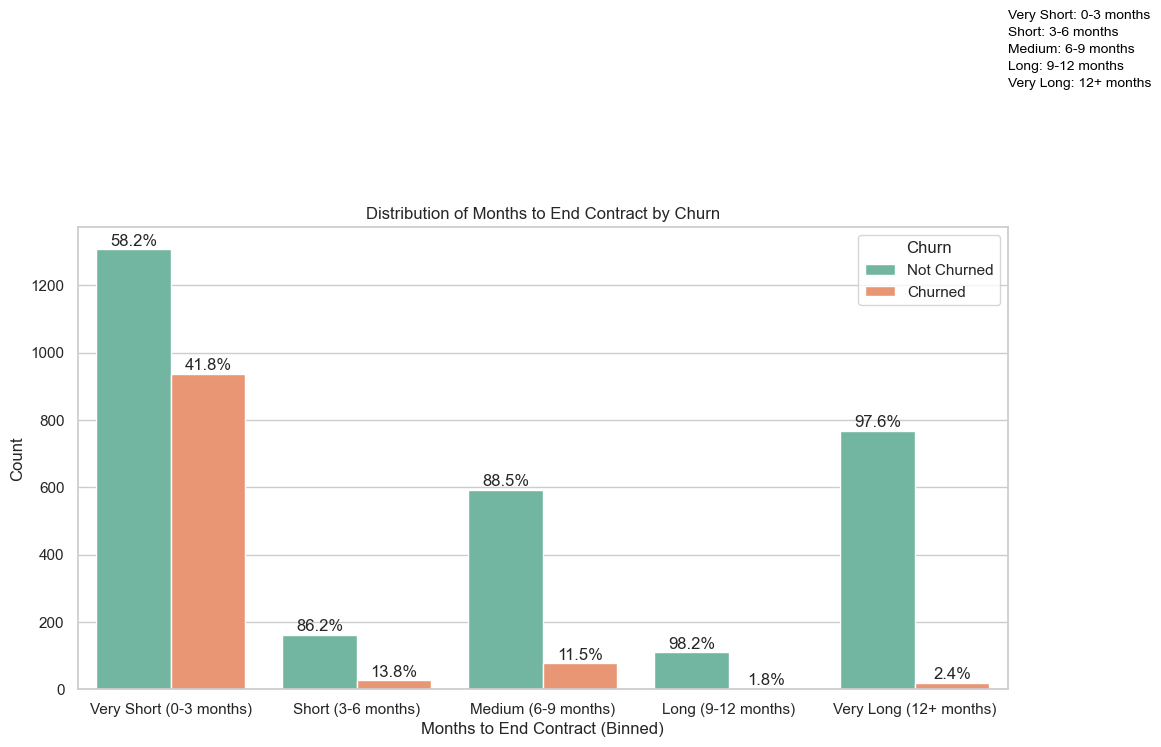

In [143]:
# Bin Month_to_end_contract into categories for better visualization
df['Month_to_end_contract_bins'] = pd.cut(df['Month_to_end_contract'], bins=5, 
                                          labels=['Very Short (0-3 months)', 
                                                  'Short (3-6 months)', 
                                                  'Medium (6-9 months)', 
                                                  'Long (9-12 months)', 
                                                  'Very Long (12+ months)'])

# Plot distribution of Month_to_end_contract by Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Month_to_end_contract_bins", hue="Churn", palette="Set2")
plt.title("Distribution of Months to End Contract by Churn")
plt.xlabel("Months to End Contract (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

for i, label in enumerate(bin_labels):
    plt.text(x=4.5,  # Position the legend text to the side
             y=(len(df) / 2) - (i * 50),  # Adjust vertical spacing for labels
             s=f"{label}", 
             fontsize=10, 
             ha="left", 
             va="center", 
             color="black")

# Calculate percentage distribution
contract_end_counts = df.groupby(['Month_to_end_contract_bins', 'Churn']).size().unstack(fill_value=0)
contract_end_percentage = contract_end_counts.div(contract_end_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_end_counts.index)):
    for j in range(len(contract_end_counts.columns)):
        count_value = contract_end_counts.values[i, j]
        percentage = contract_end_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


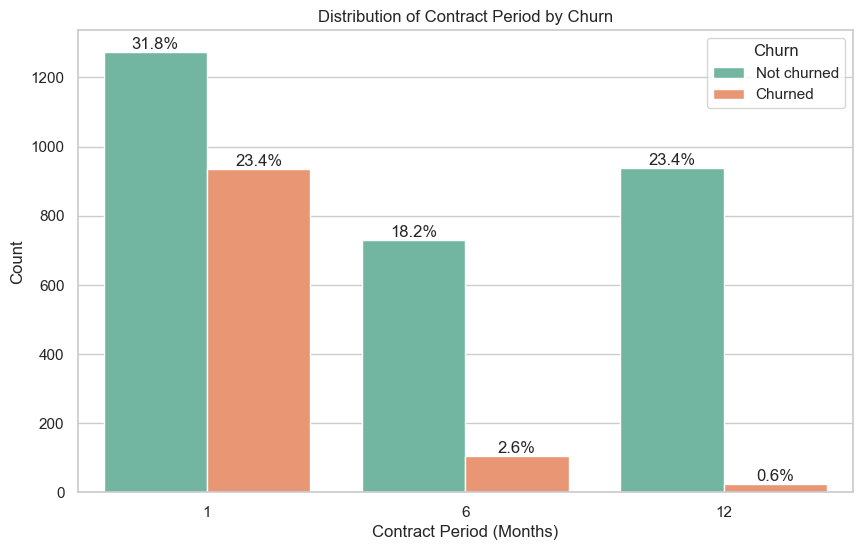

In [152]:
# Plot distribution of Contract Period by Churn with percentages above the bars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract_period", hue="Churn", palette="Set2")
plt.title("Distribution of Contract Period by Churn")
plt.xlabel("Contract Period (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not churned", "Churned"])

# Calculate percentage distribution relative to the overall count (entire dataset)
contract_period_counts = df.groupby(['Contract_period', 'Churn']).size().unstack(fill_value=0)
contract_period_counts_total = contract_period_counts.sum().sum()  # Total count of all records in the dataset
contract_period_counts_percentage = contract_period_counts.div(contract_period_counts_total, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_period_counts.index)):
    for j in range(len(contract_period_counts.columns)):
        count_value = contract_period_counts.values[i, j]
        percentage = contract_period_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


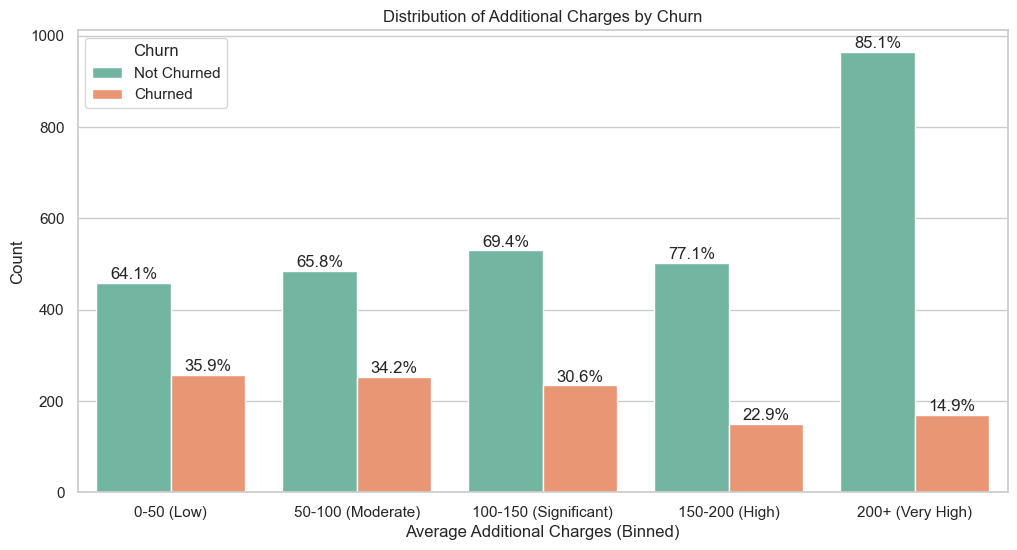

In [151]:
# Bin Avg_additional_charges_total into 5 intervals and add meaningful labels
df['Additional_charges_bins'] = pd.cut(
    df['Avg_additional_charges_total'],
    bins=[0, 50, 100, 150, 200, df['Avg_additional_charges_total'].max()], 
    labels=['0-50 (Low)', '50-100 (Moderate)', '100-150 (Significant)', '150-200 (High)', '200+ (Very High)'],
    include_lowest=True
)

# Plot distribution of Avg_additional_charges_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Additional_charges_bins", hue="Churn", palette="Set2")
plt.title("Distribution of Additional Charges by Churn")
plt.xlabel("Average Additional Charges (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate percentage distribution
additional_charges_counts = df.groupby(['Additional_charges_bins', 'Churn']).size().unstack(fill_value=0)
additional_charges_percentage = additional_charges_counts.div(additional_charges_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(additional_charges_counts.index)):
    for j in range(len(additional_charges_counts.columns)):
        count_value = additional_charges_counts.values[i, j]
        percentage = additional_charges_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()

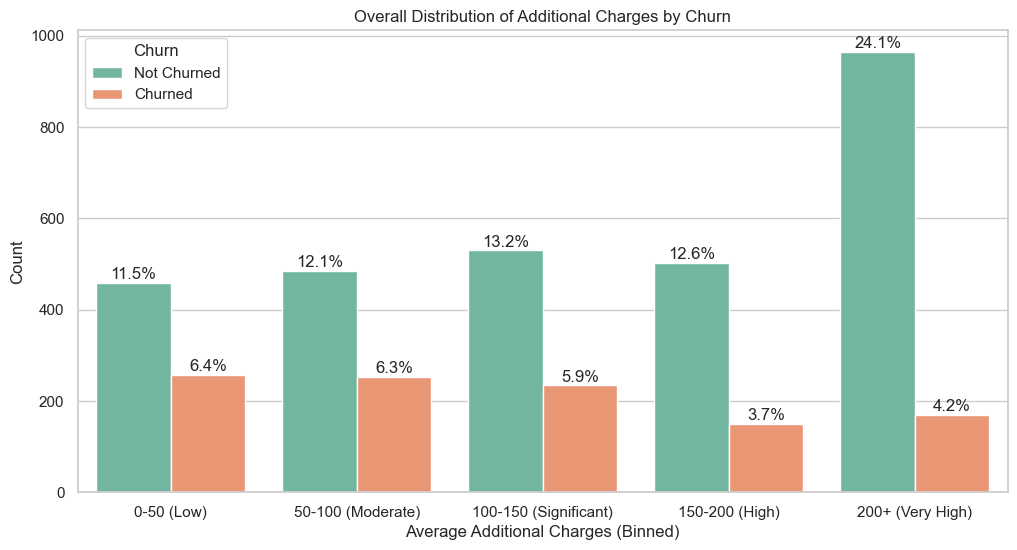

In [149]:
# Bin Avg_additional_charges_total into 5 intervals and add meaningful labels
df['Additional_charges_bins'] = pd.cut(
    df['Avg_additional_charges_total'],
    bins=[0, 50, 100, 150, 200, df['Avg_additional_charges_total'].max()], 
    labels=['0-50 (Low)', '50-100 (Moderate)', '100-150 (Significant)', '150-200 (High)', '200+ (Very High)'],
    include_lowest=True
)

# Plot distribution of Avg_additional_charges_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Additional_charges_bins", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Additional Charges by Churn")
plt.xlabel("Average Additional Charges (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate percentage distribution relative to the overall count (not by bin)
total_counts = df['Churn'].count()  # Total number of customers
additional_charges_counts = df.groupby(['Additional_charges_bins', 'Churn']).size().unstack(fill_value=0)
additional_charges_percentage = additional_charges_counts.div(total_counts, axis=0) * 100  # Relative to overall count

# Adding percentage annotations above the bars
for i in range(len(additional_charges_counts.index)):
    for j in range(len(additional_charges_counts.columns)):
        count_value = additional_charges_counts.values[i, j]
        percentage = additional_charges_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


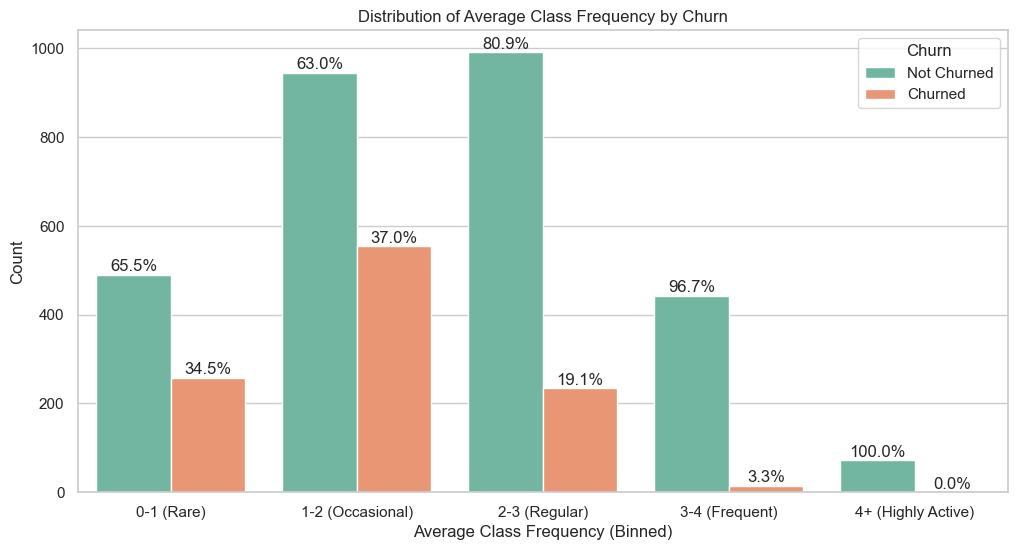

In [131]:
# Bin Avg_class_frequency_total into 5 intervals and add meaningful labels
df['Class_frequency_bins'] = pd.cut(
    df['Avg_class_frequency_total'],
    bins=[0, 1, 2, 3, 4, df['Avg_class_frequency_total'].max()], 
    labels=['0-1 (Rare)', '1-2 (Occasional)', '2-3 (Regular)', '3-4 (Frequent)', '4+ (Highly Active)'],
    include_lowest=True
)

# Plot distribution of Avg_class_frequency_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Class_frequency_bins", hue="Churn", palette="Set2")
plt.title("Distribution of Average Class Frequency by Churn")
plt.xlabel("Average Class Frequency (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate percentage distribution
class_frequency_counts = df.groupby(['Class_frequency_bins', 'Churn']).size().unstack(fill_value=0)
class_frequency_percentage = class_frequency_counts.div(class_frequency_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(class_frequency_counts.index)):
    for j in range(len(class_frequency_counts.columns)):
        count_value = class_frequency_counts.values[i, j]
        percentage = class_frequency_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()

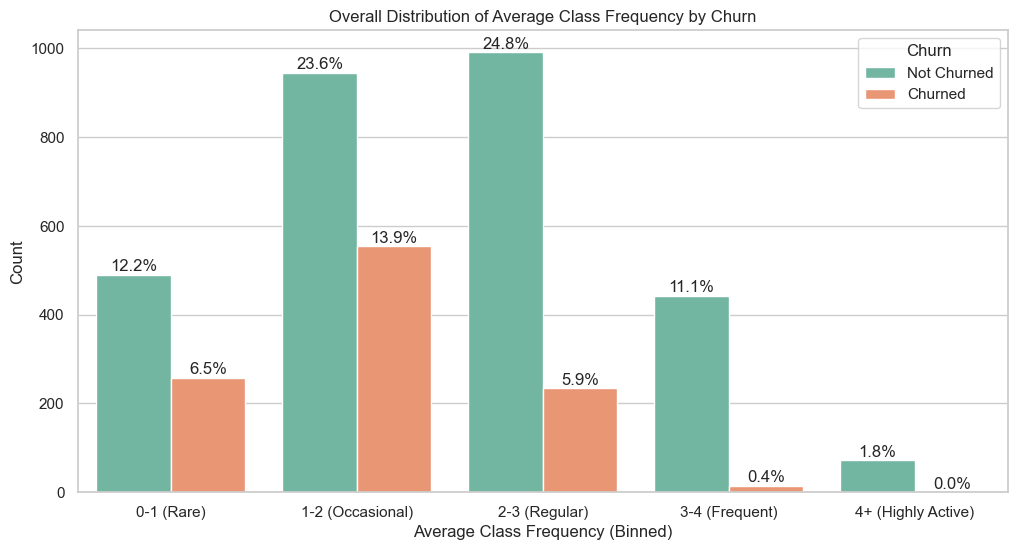

In [154]:
# Bin Avg_class_frequency_total into 5 intervals and add meaningful labels
df['Class_frequency_bins'] = pd.cut(
    df['Avg_class_frequency_total'],
    bins=[0, 1, 2, 3, 4, df['Avg_class_frequency_total'].max()], 
    labels=['0-1 (Rare)', '1-2 (Occasional)', '2-3 (Regular)', '3-4 (Frequent)', '4+ (Highly Active)'],
    include_lowest=True
)

# Plot distribution of Avg_class_frequency_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Class_frequency_bins", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Average Class Frequency by Churn")
plt.xlabel("Average Class Frequency (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate the percentage distribution in relation to the overall count (not per bin)
total_counts = df['Churn'].value_counts()  # Overall counts of churned and not churned customers
total_count = len(df)  # Total number of customers

# Grouping by 'Class_frequency_bins' and 'Churn'
class_frequency_counts = df.groupby(['Class_frequency_bins', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages relative to the overall count
class_frequency_percentage = class_frequency_counts.div(total_count, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(class_frequency_counts.index)):
    for j in range(len(class_frequency_counts.columns)):
        count_value = class_frequency_counts.values[i, j]
        percentage = class_frequency_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


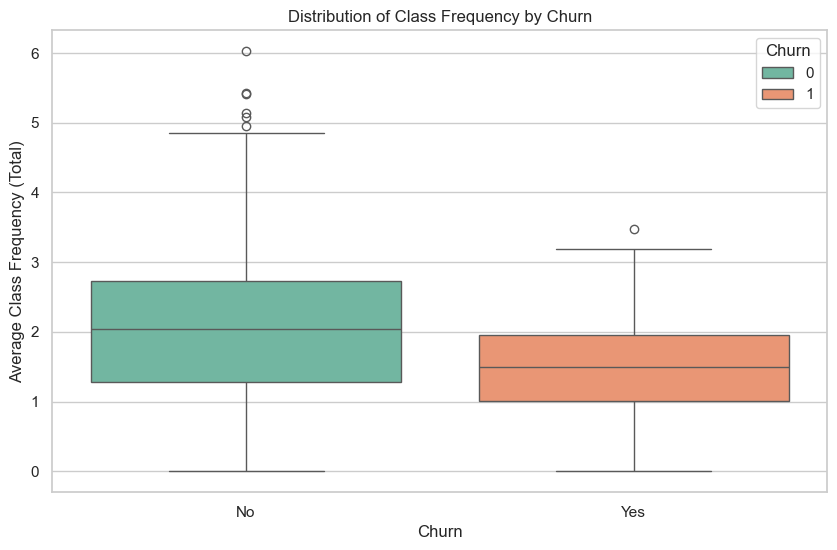

In [92]:
# Distribution of Class Frequency by Churn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Churn", y="Avg_class_frequency_total",hue='Churn', palette="Set2")
plt.title("Distribution of Class Frequency by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Class Frequency (Total)")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

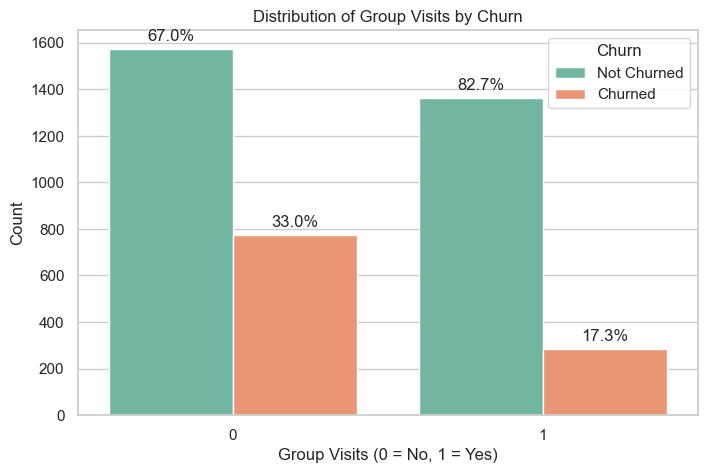

In [161]:
# Distribution of Group_visits by Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Group_visits', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Group Visits by Churn')
plt.ylabel('Count')
plt.xlabel('Group Visits (0 = No, 1 = Yes)')

# Calculate percentage distribution within each Group_visits category
group_visits_counts = df.groupby(['Group_visits', 'Churn']).size().unstack(fill_value=0)

# Calculate percentage within each Group_visits category (sum per group)
group_visits_counts_percentage = group_visits_counts.div(group_visits_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations within each Group_visits category
for i in range(len(group_visits_counts.index)):
    total = group_visits_counts.values[i].sum()  # Total count for the current Group_visits category
    for j in range(len(group_visits_counts.columns)):
        count_value = group_visits_counts.values[i, j]
        percentage = group_visits_counts_percentage.values[i, j]
        # Adjust x-position for each bar to avoid overlapping
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


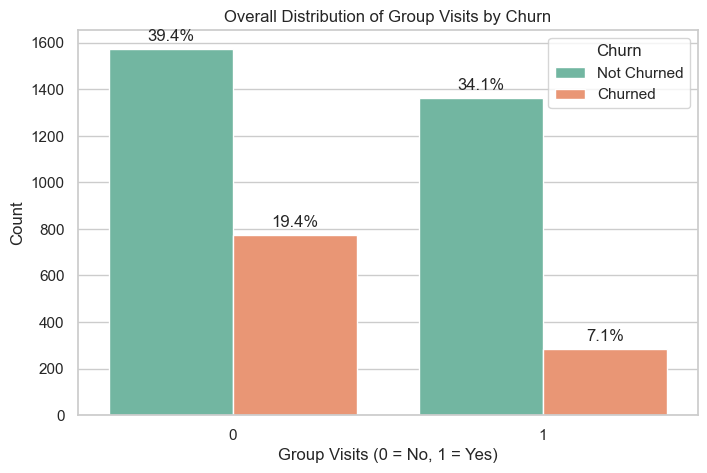

In [159]:
# Distribution of Group_visits by Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Group_visits', hue='Churn', data=df, palette='Set2')
plt.title('Overall Distribution of Group Visits by Churn')
plt.ylabel('Count')
plt.xlabel('Group Visits (0 = No, 1 = Yes)')

# Calculate overall percentage distribution
group_visits_counts = df.groupby(['Group_visits', 'Churn']).size().unstack(fill_value=0)
total_count = len(df)

# Calculate percentage in relation to the total count of the dataset
group_visits_counts_percentage = group_visits_counts.div(total_count, axis=0) * 100

# Adding percentage annotations
for i in range(len(group_visits_counts.index)):
    for j in range(len(group_visits_counts.columns)):
        count_value = group_visits_counts.values[i, j]
        percentage = group_visits_counts_percentage.values[i, j]
        # Adjust x-position for each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


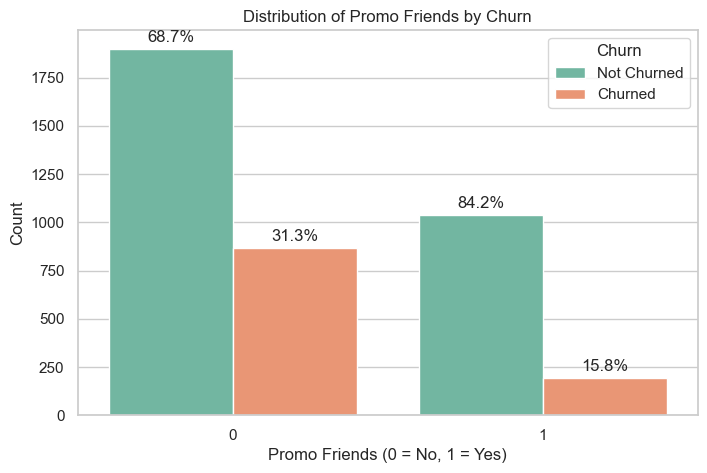

In [112]:
# Distribution of Churn by Promo_friends
plt.figure(figsize=(8, 5))
sns.countplot(x='Promo_friends', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Promo Friends by Churn')
plt.ylabel('Count')
plt.xlabel('Promo Friends (0 = No, 1 = Yes)')

# Calculate percentage distribution
promo_friends_counts = df.groupby(['Promo_friends', 'Churn']).size().unstack(fill_value=0)
promo_friends_counts_percentage = promo_friends_counts.div(promo_friends_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations
for i in range(len(promo_friends_counts.index)):
    total = promo_friends_counts.values[i].sum()
    for j in range(len(promo_friends_counts.columns)):
        percentage = promo_friends_counts_percentage.values[i, j]
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position for each bar
                 y=promo_friends_counts.values[i, j] + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


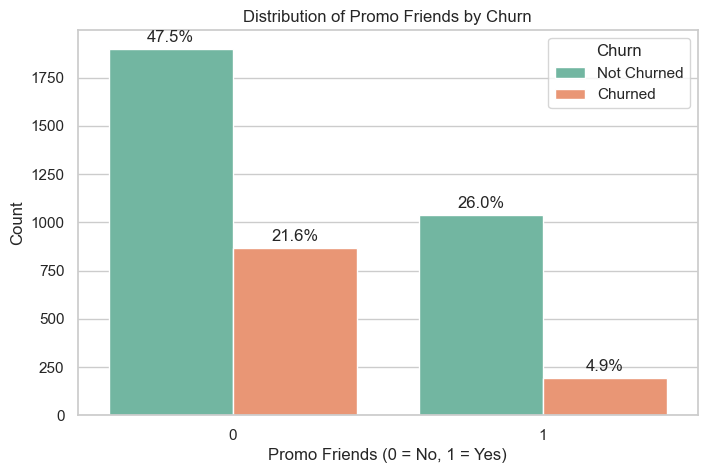

In [158]:
# Distribution of Churn by Promo_friends
plt.figure(figsize=(8, 5))
sns.countplot(x='Promo_friends', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Promo Friends by Churn')
plt.ylabel('Count')
plt.xlabel('Promo Friends (0 = No, 1 = Yes)')

# Calculate overall percentage distribution
promo_friends_counts = df.groupby(['Promo_friends', 'Churn']).size().unstack(fill_value=0)
total_count = len(df)

# Calculate percentage in relation to the total count of the dataset
promo_friends_counts_percentage = promo_friends_counts.div(total_count, axis=0) * 100

# Adding percentage annotations
for i in range(len(promo_friends_counts.index)):
    for j in range(len(promo_friends_counts.columns)):
        count_value = promo_friends_counts.values[i, j]
        percentage = promo_friends_counts_percentage.values[i, j]
        # Adjust x-position for each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

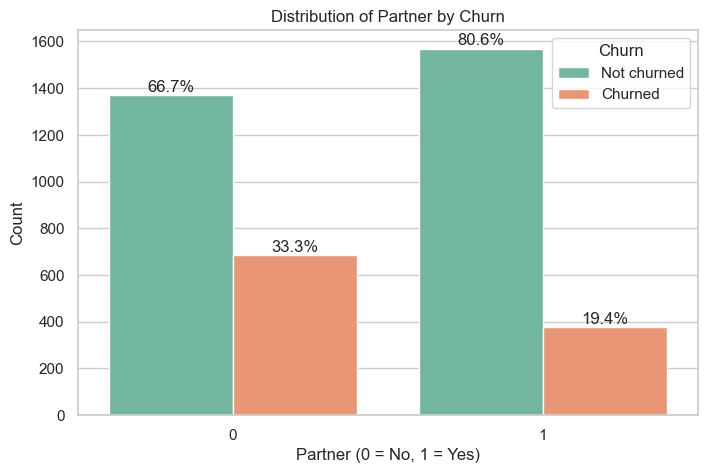

In [113]:
# Plot distribution of Partner by Churn with percentages above the bars
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Partner", hue="Churn", palette="Set2")
plt.title("Distribution of Partner by Churn")
plt.xlabel("Partner (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Calculate percentage distribution
partner_counts = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
partner_counts_percentage = partner_counts.div(partner_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(partner_counts.index)):
    for j in range(len(partner_counts.columns)):
        count_value = partner_counts.values[i, j]
        percentage = partner_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["Not churned", "Churned"])
plt.show()


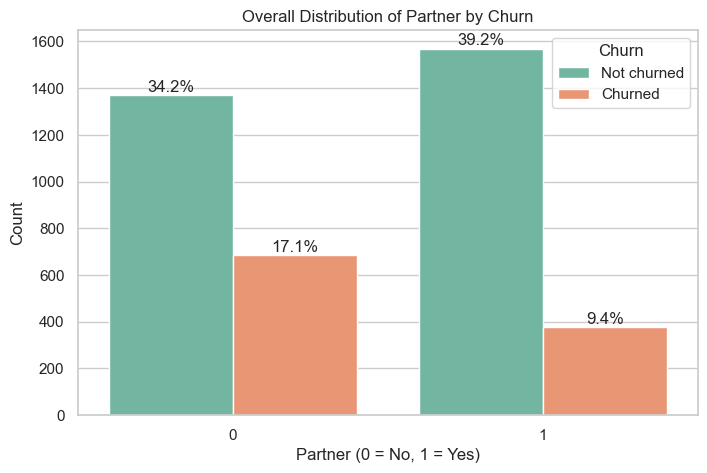

In [156]:
# Plot distribution of Partner by Churn with percentages above the bars
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Partner", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Partner by Churn")
plt.xlabel("Partner (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Calculate the overall count distribution
partner_counts = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
total_counts = df.shape[0]  # Total number of records

# Calculate percentage distribution based on overall count
partner_counts_percentage = partner_counts.div(total_counts, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(partner_counts.index)):
    for j in range(len(partner_counts.columns)):
        count_value = partner_counts.values[i, j]
        percentage = partner_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["Not churned", "Churned"])
plt.show()


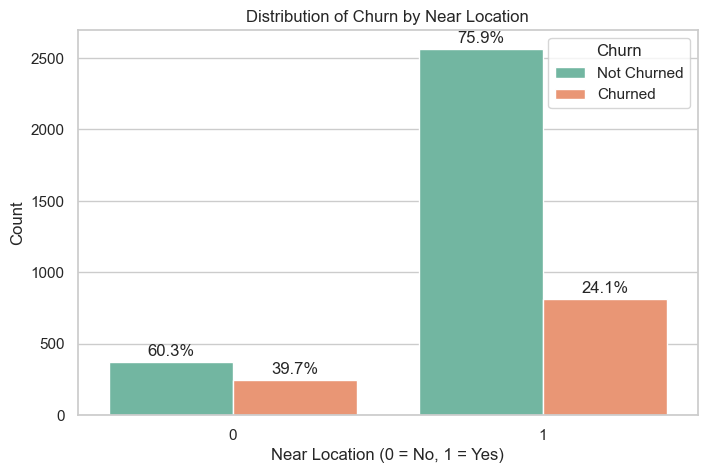

In [75]:
# Distribution of Churn by Near_Location
plt.figure(figsize=(8, 5))
sns.countplot(x='Near_Location', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn by Near Location')
plt.ylabel('Count')
plt.xlabel('Near Location (0 = No, 1 = Yes)')

# Calculate percentage distribution
near_location_counts = df.groupby(['Near_Location', 'Churn']).size().unstack(fill_value=0)
near_location_counts_percentage = near_location_counts.div(near_location_counts.sum(axis=1), axis=0) * 100

# Adding percentage annotations
for i in range(len(near_location_counts.index)):
    total = near_location_counts.values[i].sum()
    for j in range(len(near_location_counts.columns)):
        percentage = near_location_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=near_location_counts.values[i, j] + 20,  # Offset to position above bars
                 s=f'{near_location_counts_percentage.values[i, j]:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)
        
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

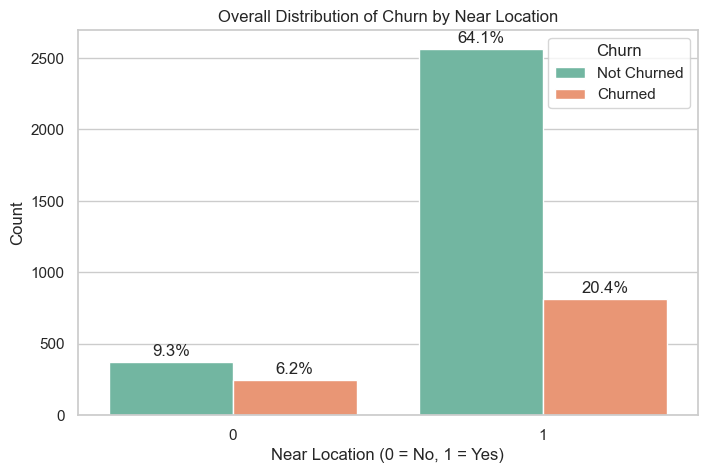

In [157]:
# Distribution of Churn by Near_Location
plt.figure(figsize=(8, 5))
sns.countplot(x='Near_Location', hue='Churn', data=df, palette='Set2')
plt.title('Overall Distribution of Churn by Near Location')
plt.ylabel('Count')
plt.xlabel('Near Location (0 = No, 1 = Yes)')

# Calculate percentage distribution relative to the overall count (total rows in the dataset)
near_location_counts = df.groupby(['Near_Location', 'Churn']).size().unstack(fill_value=0)
near_location_counts_percentage = near_location_counts.div(near_location_counts.sum().sum(), axis=0) * 100

# Adding percentage annotations
for i in range(len(near_location_counts.index)):
    for j in range(len(near_location_counts.columns)):
        count_value = near_location_counts.values[i, j]
        percentage = near_location_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Offset to position above bars
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


# **Executive Summary of EDA Insights**

This summary presents the most significant findings from the exploratory data analysis (EDA) performed on the customer dataset for churn prediction. The insights focus on identifying patterns and behaviors that influence customer churn, with implications for retention strategies.

---

## **1. Churn Distribution**
- **Churn Rate Overview**: The dataset shows an overall churn rate, with key demographic and behavioral features influencing this outcome. 

---

## **2. Age**
- **Customer Demographics**: The majority of customers are in their mid-20s to early 30s, with a mean age of 29.18.
- **Age and Churn**: Churn is more prevalent among younger customers, particularly those under 30. Customers above 30 show a lower churn rate, suggesting that older customers may be more loyal or satisfied.

---

## **3. Contract Period**
- **Contract Duration and Churn**: 
  - Customers with longer contracts (e.g., 6 or 12 months) tend to have lower churn rates. This suggests that longer commitment periods could be an indicator of higher satisfaction and loyalty.
  - Shorter contracts (e.g., 1 or 3 months) show higher churn rates, which might reflect less satisfaction or uncertainty about the service.

---

## **4. Lifetime**
- **Membership Tenure and Churn**: 
  - Newer customers (those with fewer months as members) are more likely to churn, indicating that retaining new customers may require additional attention and engagement.
  - Long-term members exhibit significantly lower churn rates, emphasizing the importance of building long-term relationships with customers.

---

## **5. Additional Charges by Churn**
- **Spending Behavior and Retention**: 
  - Customers who churn tend to have lower average additional charges. This could indicate that higher engagement with additional services (e.g., classes or add-ons) correlates with reduced churn.
  - It may be worth focusing on increasing the use of additional services for customers at risk of churning.

---

## **6. Location Proximity (Near_Location)**
- **Proximity Influence**: Customers located nearer to the gym are more likely to stay. Location plays a crucial role in retention, with customers closer to the gym showing better engagement and lower churn rates.

---

## **7. Partner Status**
- **Corporate/Partnership Programs**: Customers enrolled in corporate or partnership programs have lower churn rates compared to individual members. This suggests that partner status can significantly improve retention and may be a potential area for growth in retention strategies.

---
**Strategic Recommendations**:

- **Target Younger Audiences**: Implement programs aimed at younger customers under 30 to increase retention. Personalized marketing, loyalty rewards, and community engagement could be key strategies.
- **Promote Long-Term Contracts**: Offer special incentives or discounts for long-term contracts (6–12 months) to encourage members to commit for longer durations.
- **Increase Engagement with Premium Services**: Introduce tailored offers for additional services (e.g., training, specialized classes) to keep members engaged and reduce churn.
- **Leverage Partnerships**: Strengthen and expand partnerships with local businesses and corporate programs to increase customer loyalty and retention.


## **Conclusion**
The findings reveal several valuable insights, highlighting the importance of contract duration, membership longevity, spending behavior, and location proximity in predicting churn. Focusing on younger customers, offering incentives for longer-term commitments, and increasing engagement with additional services may all contribute to reducing churn. Additionally, emphasizing corporate or partnership programs could further enhance retention rates.


#### Relationship between features

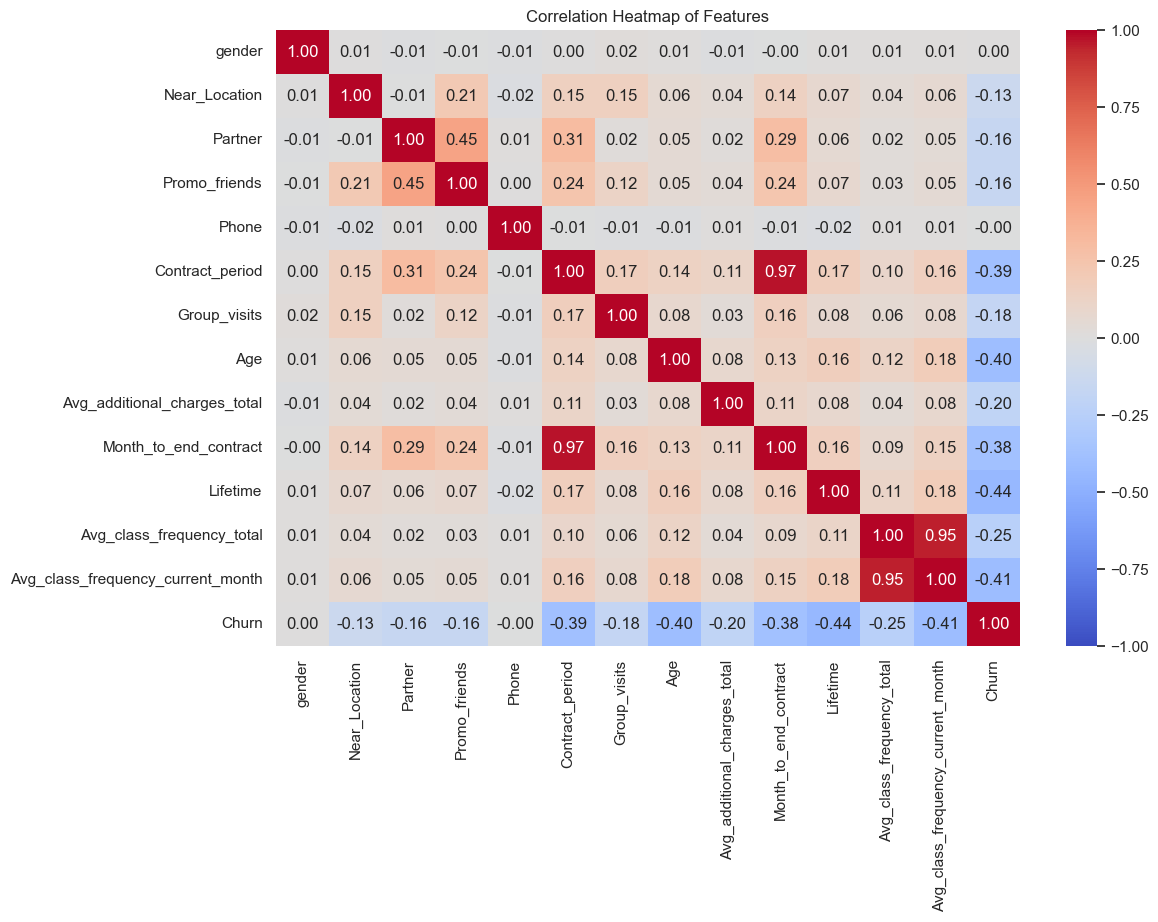

In [21]:
# Correlation heatmap for numerical features:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

In [67]:
correlation_matrix['Churn'].sort_values()

Lifetime                            -0.438220
Avg_class_frequency_current_month   -0.412348
Age                                 -0.404735
Contract_period                     -0.389984
Month_to_end_contract               -0.381393
Avg_class_frequency_total           -0.249715
Avg_additional_charges_total        -0.198697
Group_visits                        -0.175325
Promo_friends                       -0.162233
Partner                             -0.157986
Near_Location                       -0.128098
Phone                               -0.001177
gender                               0.000708
Churn                                1.000000
Name: Churn, dtype: float64

## 3. Data Preparation

In [63]:
#Lazy Predict

In [ ]:
#classification: logistic regression, decision tree, random forest,
#(convolutional) neural networks

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'churn' column to binary values (0 and 1)
df['Churn'] = encoder.fit_transform(df['Churn'])

# Confirm the transformation
print(df_cleaned[['Churn']].head())